# Multiple Linear Regression

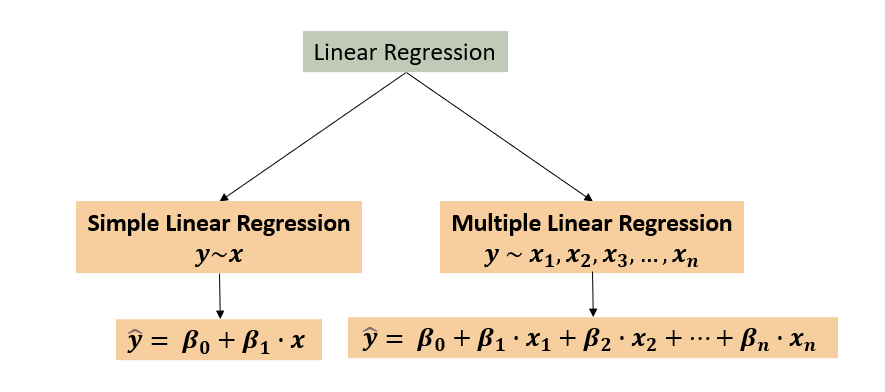

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1: Read the dataset

In [3]:
import pandas as pd 
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# PROFIT ~ RND, ADMIN, MKT

# PROFIT = B0 + B1 x RND + B2 x ADMIN + B3 x MKT

# Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# No missing values and no duplicate values for above data

# Step 3: Seperate X(RND, ADMIN, MKT) and Y(PROFIT)

# Profit ~ RND, ADMIN, MKT

In [7]:
X = df[["RND", "ADMIN", "MKT"]]
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [8]:
Y = df[["PROFIT"]]
Y.head()


,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 4: Build Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [11]:
model.intercept_

array([50122.19298987])

In [12]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [13]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [14]:
c = pd.Series(model.coef_.flatten(), index=X.columns)
c

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: >

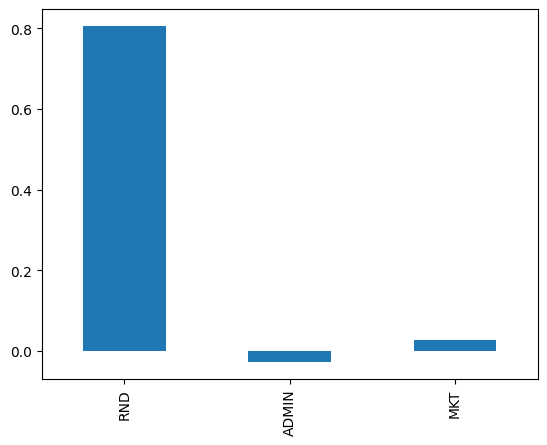

In [15]:
c.plot(kind="bar")

# From above results i can conclude RND is impacting profit the most

# PROFIT_est = 50122.19 + 0.8057 x RND - 0.0268 x ADMIN + 0.0272 x MKT

In [16]:
model.score(X, Y)

0.9507459940683246

## model Evaluation
1.Mean Squared Error
2.Root Mean Squared Error
3.Mean Absolute Error
4.Mean Absolute Percentage Error
5.R2 score

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [21]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    # Get the results
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 score : {r2:.4f}")

In [22]:
evaluate_model(model, X, Y)

MSE : 78417126.02
RMSE : 8855.34
MAE : 6471.45
MAPE : 0.1060
R2 score : 0.9507


# R2 > 0.8 it is considered to be a good model

# Out of sample prediction

In [23]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [24]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [25]:
rnd = 80000
admin = 60000
mkt = 80000
xnew = [[rnd, admin, mkt]]
profit_est = model.predict(xnew)
profit_est

array([[115148.68406351]])